### Import Libraries

In [243]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

### Membaca Dataset

In [182]:
df = pd.read_csv('Dataset/clean_data.csv', encoding='utf-8')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,hour,TotalValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,20.34


In [183]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,402368.0,12.047809,172.871722,-74215.0,2.00,5.00,12.00,74215.00
UnitPrice,402368.0,3.049108,15.251758,0.0,1.25,1.95,3.75,8142.75
CustomerID,402368.0,15287.696514,1713.721438,12346.0,13954.00,15152.00,16791.00,18287.00
year,402368.0,2010.934060,0.248177,2010.0,2011.00,2011.00,2011.00,2011.00
month,402368.0,7.611557,3.416993,1.0,5.00,8.00,11.00,12.00
day,402368.0,15.039377,8.654876,1.0,7.00,15.00,22.00,31.00
hour,402368.0,12.735645,2.285148,6.0,11.00,13.00,14.00,20.00
TotalValue,402368.0,20.683013,197.494471,-77183.6,4.20,11.25,19.50,77183.60


In [184]:
df.describe(include='O').T

,count,unique,top,freq
InvoiceNo,402368,21885,576339,534
StockCode,402368,3594,85123A,2077
Description,402368,3783,WHITE HANGING HEART T-LIGHT HOLDER,2070
InvoiceDate,402368,20219,2011-11-14 15:27:00,534
Country,402368,37,United Kingdom,357819


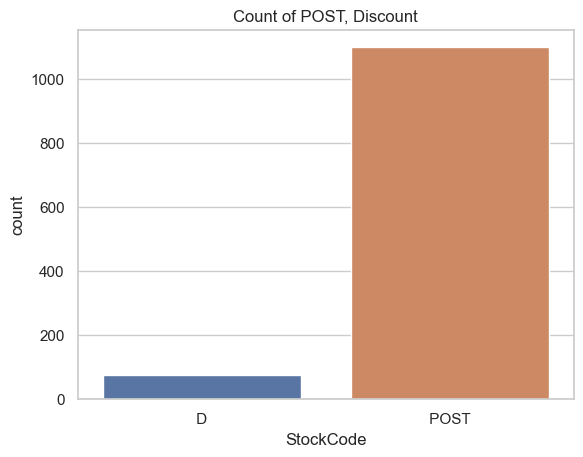

In [185]:
D = df[df['StockCode']=='D'].value_counts().sum()
POST = df[df['StockCode']=='POST'].value_counts().sum()

#toframe
df1 = pd.DataFrame({'StockCode':[' D ', ' POST '], 'count':[D, POST]})

#plot
sns.barplot(x='StockCode', y='count', data=df1)
plt.title("Count of POST, Discount")
plt.show()  

In [186]:
quantity_per_year = df.groupby('year')['Quantity'].sum()

quantity_per_year.to_frame().reset_index()

,year,Quantity
0,2010,292264.0
1,2011,4555389.0


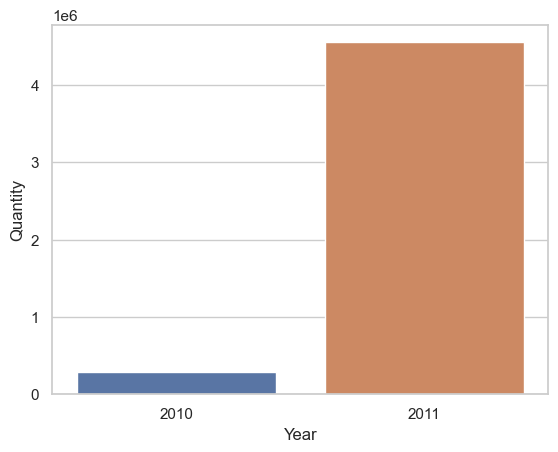

In [187]:
sns.barplot(data=quantity_per_year, x=quantity_per_year.index, y=quantity_per_year.values)
plt.xticks(range(len(quantity_per_year.index)), quantity_per_year.index)

plt.xlabel('Year')
plt.ylabel('Quantity')
plt.show()

### Analisa Perbandingan Daya Beli Tiap Negara

In [188]:
quantity_per_country = df.groupby('Country')['Quantity'].agg('sum')

quantity_per_country = quantity_per_country.sort_values(ascending=False)

#change column name
quantity_per_country = quantity_per_country.to_frame()
quantity_per_country = quantity_per_country.reset_index()
quantity_per_country = quantity_per_country.rename(columns={'Quantity':'Total Quantity'})

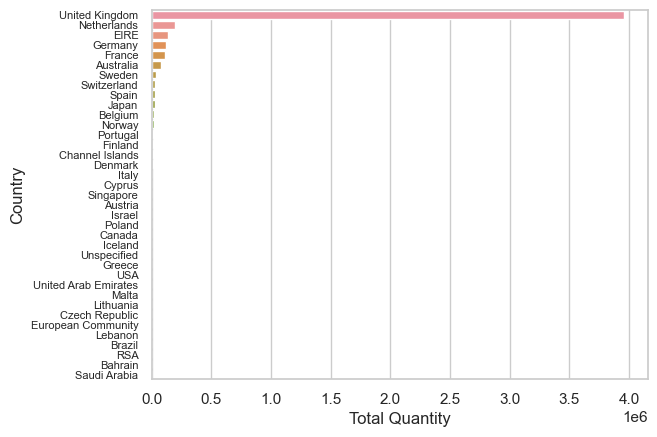

In [189]:
sns.barplot(data=quantity_per_country, x='Total Quantity', y='Country')
plt.xlabel('Total Quantity')
plt.ylabel('Country')
plt.yticks(fontsize=8)

#add vertical lines for the mean
#plt.axvline(quantity_per_country['Total Quantity'].mean(), color='green', linestyle='--')

plt.show()

In [240]:
import plotly.express as px

# Create a choropleth map using plotly
fig = px.choropleth(quantity_per_country, locations='Country', locationmode='country names', color='Total Quantity',
                    hover_name='Country', color_continuous_scale='greens', range_color=(0, 100000))

# Update the map layout
fig.update_layout(
    title='Choropleth Map of Total Quantity per Country',
    xaxis=dict(title='Total Quantity'),
    yaxis=dict(title='Country')
)

#add annotator for arrow directing to United Kingdom and United States
fig.add_annotation(x=0.49, y=0.83, text="United Kingdom", showarrow=True, arrowhead=1)
fig.add_annotation(x=0.23, y=0.82, text="Canada", showarrow=True, arrowhead=1)
fig.add_annotation(x=0.78, y=0.39, text="Australia", showarrow=True, arrowhead=1)

#adjust text font size
fig.update_layout(
    font=dict(
        size=16,
        color = 'red'
    )   
)
                


# Show the map
fig.show()


### Analisa Item Yang Sering Dibeli Tiap Negara

In [191]:
favourite_item = df.groupby(['Country', 'Description'])['Quantity'].agg('sum').reset_index().sort_values('Quantity', ascending=False)
favourite_item

,Country,Description,Quantity
18785,United Kingdom,WORLD WAR 2 GLIDERS ASSTD DESIGNS,47982.0
16835,United Kingdom,JUMBO BAG RED RETROSPOT,40880.0
15329,United Kingdom,ASSORTED COLOUR BIRD ORNAMENT,32679.0
18698,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,32097.0
17624,United Kingdom,POPCORN HOLDER,28562.0
...,...,...,...
2814,Czech Republic,PINK METAL CHICKEN HEART,-24.0
9189,Israel,SPACEBOY TV DINNER TRAY,-32.0
620,Austria,ANGEL DECORATION STARS ON DRESS,-48.0
16153,United Kingdom,Discount,-1191.0


### Most Buyed Items

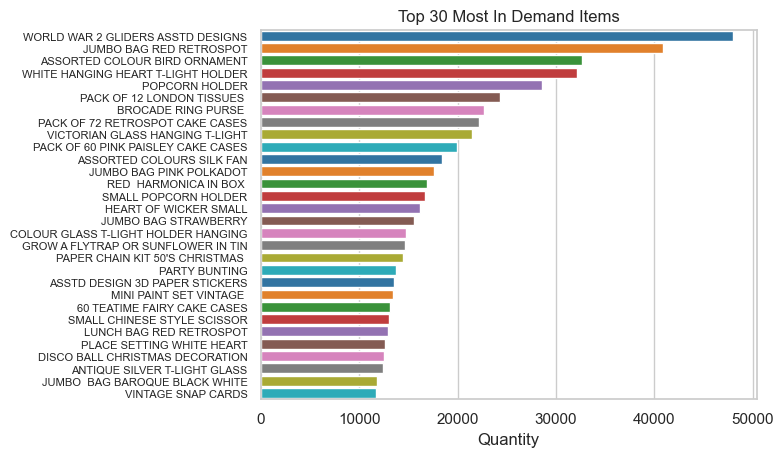

In [192]:
sns.barplot(data=favourite_item.head(30), x='Quantity', y='Description', palette='tab10')
plt.xlabel('Quantity')
plt.ylabel('')
plt.title('Top 30 Most In Demand Items')
plt.yticks(fontsize=8)
plt.show()

#### Most Buyed Items Per Country

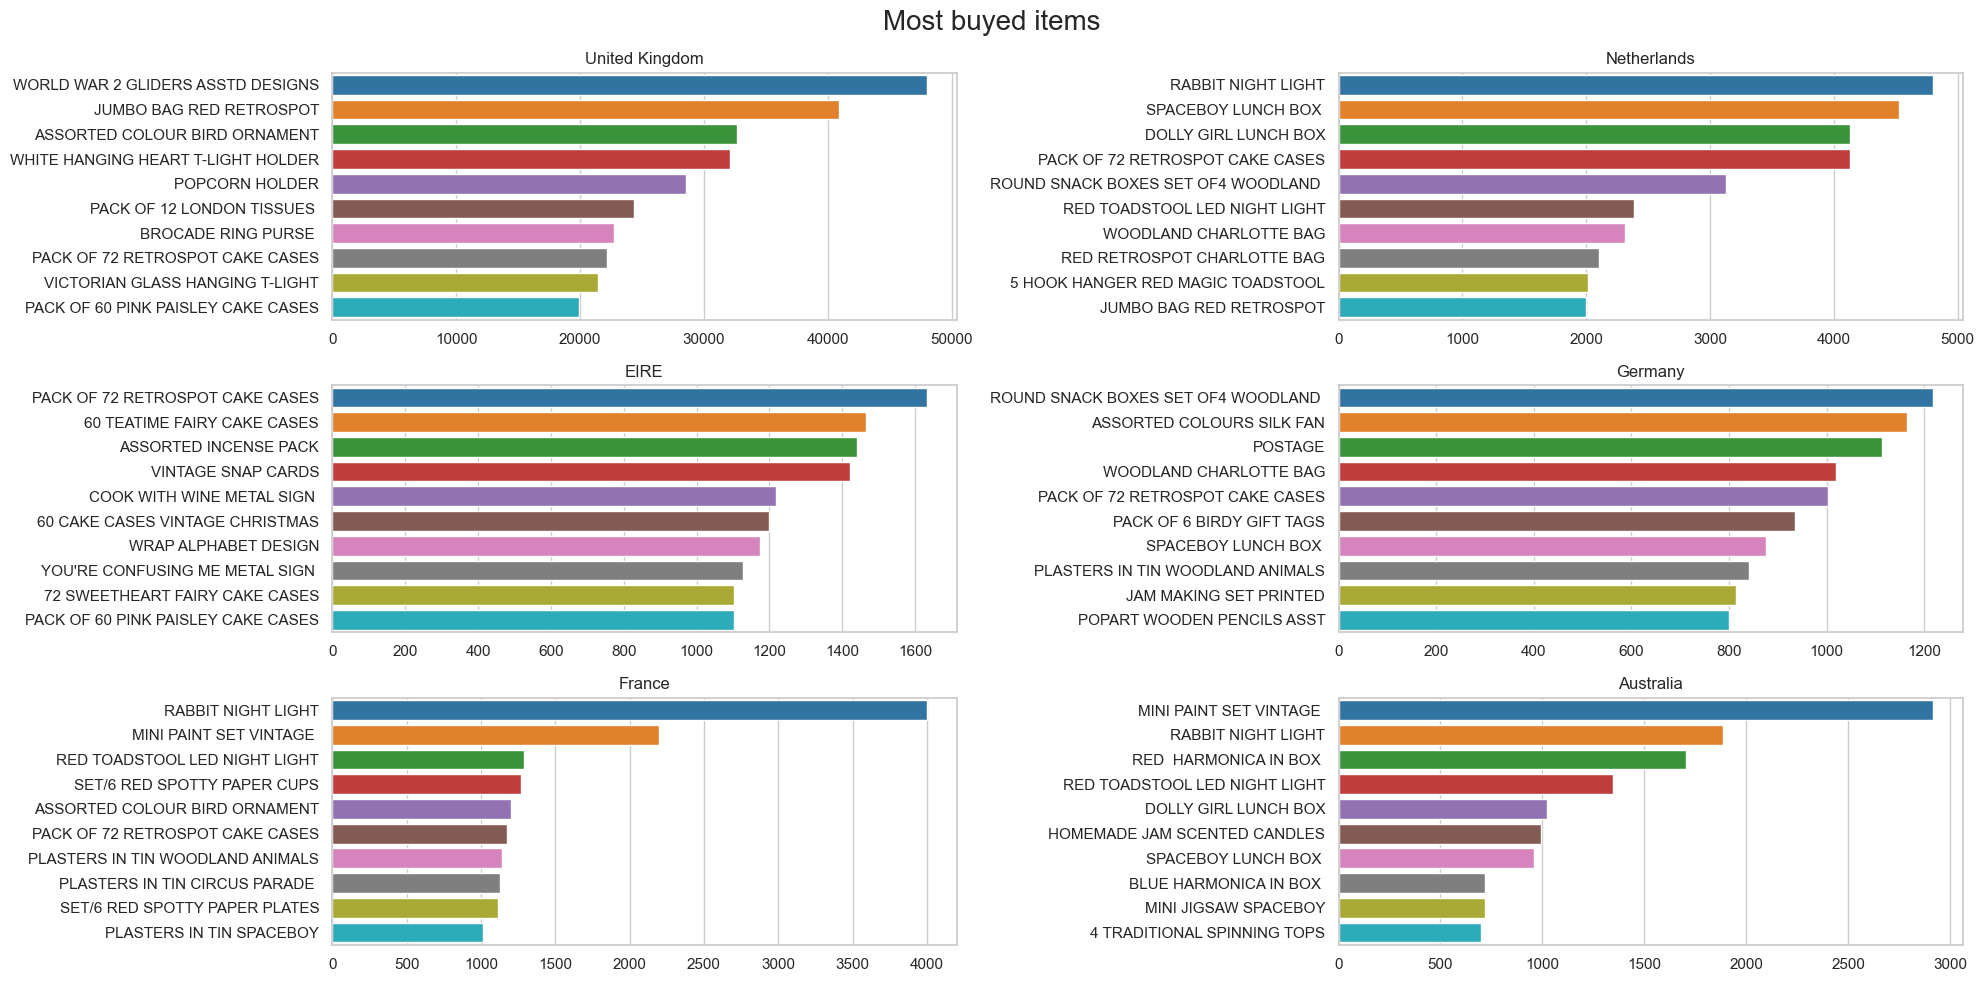

In [193]:
#combine that most buyed items in one figure
fig, axes = plt.subplots(3, 2, figsize=(20, 10))
fig.suptitle('Most buyed items', fontsize=20)
for ax, item in zip(axes.flatten(), quantity_per_country['Country'].head(6)):
    sns.barplot(data=favourite_item[favourite_item['Country']==item].head(10), x='Quantity', y='Description', palette='tab10', ax=ax)
    ax.set_title(item)
    ax.set_xlabel('')
    ax.set_ylabel('')
plt.tight_layout()
plt.show()


#### Perbandingan Item yang Dilakukan Refund

In [194]:
refunded_item = df.groupby(['CustomerID', 'Description'])['Quantity'].agg('sum').reset_index().sort_values('Quantity', ascending=True)
refunded_item = refunded_item[refunded_item['Quantity'] < 0]
refunded_item['Quantity'] = refunded_item['Quantity'] * -1
refunded_item

,CustomerID,Description,Quantity
159930,15838.0,ROTATING SILVER ANGELS T-LIGHT HLDR,9360.0
155734,15749.0,TEA TIME PARTY BUNTING,1300.0
184426,16422.0,Discount,723.0
27641,12901.0,Discount,240.0
188906,16546.0,HEART WOODEN CHRISTMAS DECORATION,192.0
...,...,...,...
262057,18168.0,PINK DOUGHNUT TRINKET POT,1.0
213936,17085.0,MINI CAKE STAND HANGING STRAWBERY,1.0
36342,13113.0,LUNCH BAG RED RETROSPOT,1.0
88669,14356.0,SWEETHEART 3 TIER CAKE STAND,1.0


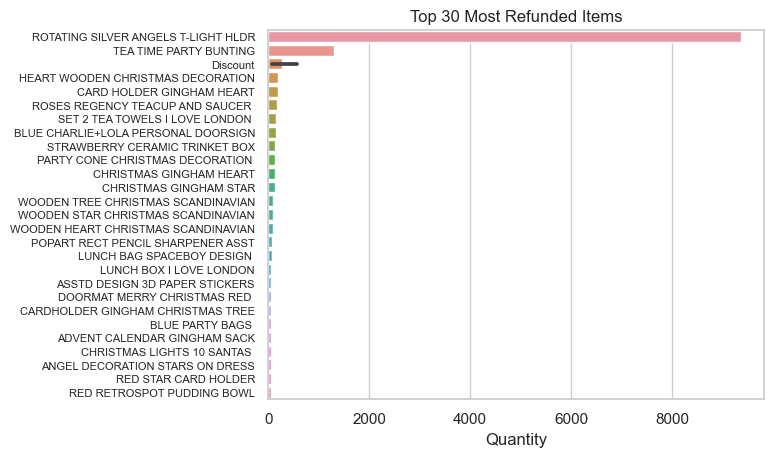

In [195]:
sns.barplot(data=refunded_item.head(30), x='Quantity', y='Description')
plt.xlabel('Quantity')
plt.ylabel('')
plt.title('Top 30 Most Refunded Items')
plt.yticks(fontsize=8)
plt.show()


#### Negara yang Sering Melakukan Refund

In [196]:
refund_per_country  = df.groupby(['Country', 'CustomerID'])['Quantity'].agg('sum').reset_index().sort_values('Quantity',ascending=True)
refund_per_country['Quantity'] = refund_per_country['Quantity'] * -1
#replace value of quantity that < 0
refund_per_country.loc[refund_per_country['Quantity'] < 0, 'Quantity'] = 0
refund_per_country.drop('CustomerID', axis=1, inplace=True)
refund_per_country = refund_per_country.groupby('Country')['Quantity'].agg('sum').reset_index().sort_values('Quantity',ascending=False)
refund_per_country

,Country,Quantity
35,United Kingdom,1723.0
17,Israel,56.0
14,Germany,4.0
0,Australia,0.0
27,RSA,0.0
22,Malta,0.0
23,Netherlands,0.0
24,Norway,0.0
25,Poland,0.0
26,Portugal,0.0


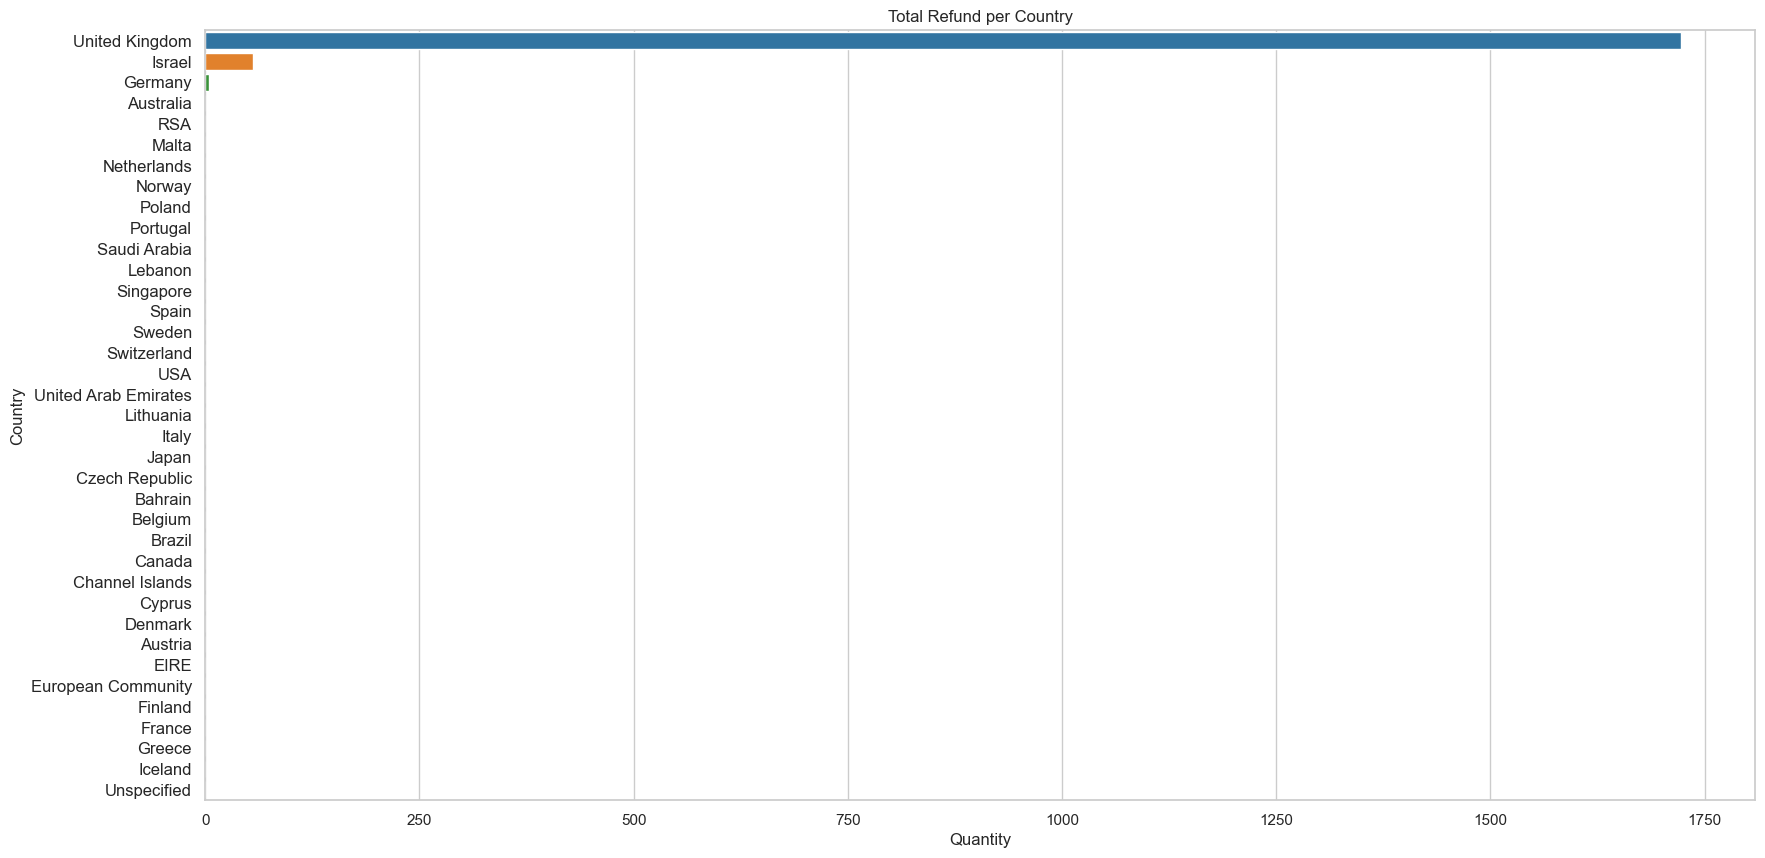

In [213]:
#adjust figsize
plt.figure(figsize=(20, 10))

sns.barplot(data=refund_per_country, x='Quantity', y='Country', palette='tab10')
plt.xlabel('Quantity')
plt.ylabel('Country')
plt.title('Total Refund per Country')
plt.yticks(fontsize=12)
plt.show()

In [211]:
refund_per_country[refund_per_country['Quantity'] > 0]

,Country,Quantity
35,United Kingdom,1723.0
17,Israel,56.0
14,Germany,4.0


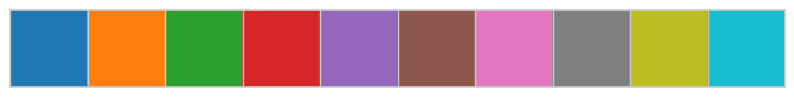

In [197]:
#print palette
sns.palplot(sns.color_palette('tab10', 10))


#### Perbandingan Harga Item

In [198]:
perbandingan_harga_item = df[['Description', 'UnitPrice']]


In [216]:
perbandingan_harga_item = perbandingan_harga_item.drop_duplicates(subset=['Description'])
perbandingan_harga_item = perbandingan_harga_item.sort_values('UnitPrice', ascending=False)
perbandingan_harga_item.head()

,Description,UnitPrice
157170,PICNIC BASKET WICKER 60 PIECES,649.5
3733,VINTAGE RED KITCHEN CABINET,295.0
15964,LOVE SEAT ANTIQUE WHITE METAL,175.0
12626,REGENCY MIRROR WITH SHUTTERS,165.0
245,RUSTIC SEVENTEEN DRAWER SIDEBOARD,165.0


In [218]:
perbandingan_harga_item[perbandingan_harga_item['Description']=='WORLD WAR 2 GLIDERS ASSTD DESIGNS']

,Description,UnitPrice
2089,WORLD WAR 2 GLIDERS ASSTD DESIGNS,0.29


In [220]:
perbandingan_harga_item[perbandingan_harga_item['UnitPrice']==0.001]

,Description,UnitPrice
108660,PADS TO MATCH ALL CUSHIONS,0.001


In [219]:
perbandingan_harga_item['UnitPrice'].describe()

count    3783.000000
mean        3.789937
std        13.455642
min         0.001000
25%         1.250000
50%         2.100000
75%         4.150000
max       649.500000
Name: UnitPrice, dtype: float64

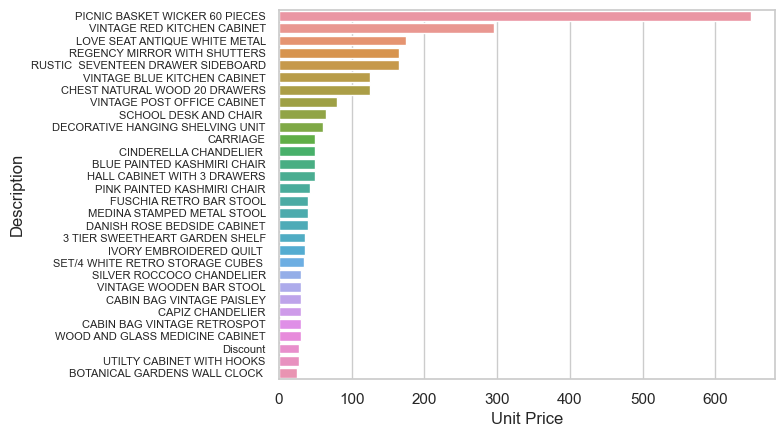

In [202]:
sns.barplot(data=perbandingan_harga_item.head(30), x='UnitPrice', y='Description')
plt.xlabel('Unit Price')
plt.ylabel('Description')
plt.yticks(fontsize=8)
#plt.axvline(perbandingan_harga_item['UnitPrice'].mean(), color='green', linestyle='--')

plt.show()

In [203]:
#take min value of Description == POSTAGE of each country
min = df[df['Description'] == 'POSTAGE'].groupby('Country')['UnitPrice'].min()
min = min.sort_values(ascending=True)

In [204]:
#take max value of Description == POSTAGE of each country
max = df[df['Description'] == 'POSTAGE'].groupby('Country')['UnitPrice'].max()
max = max.sort_values(ascending=False)

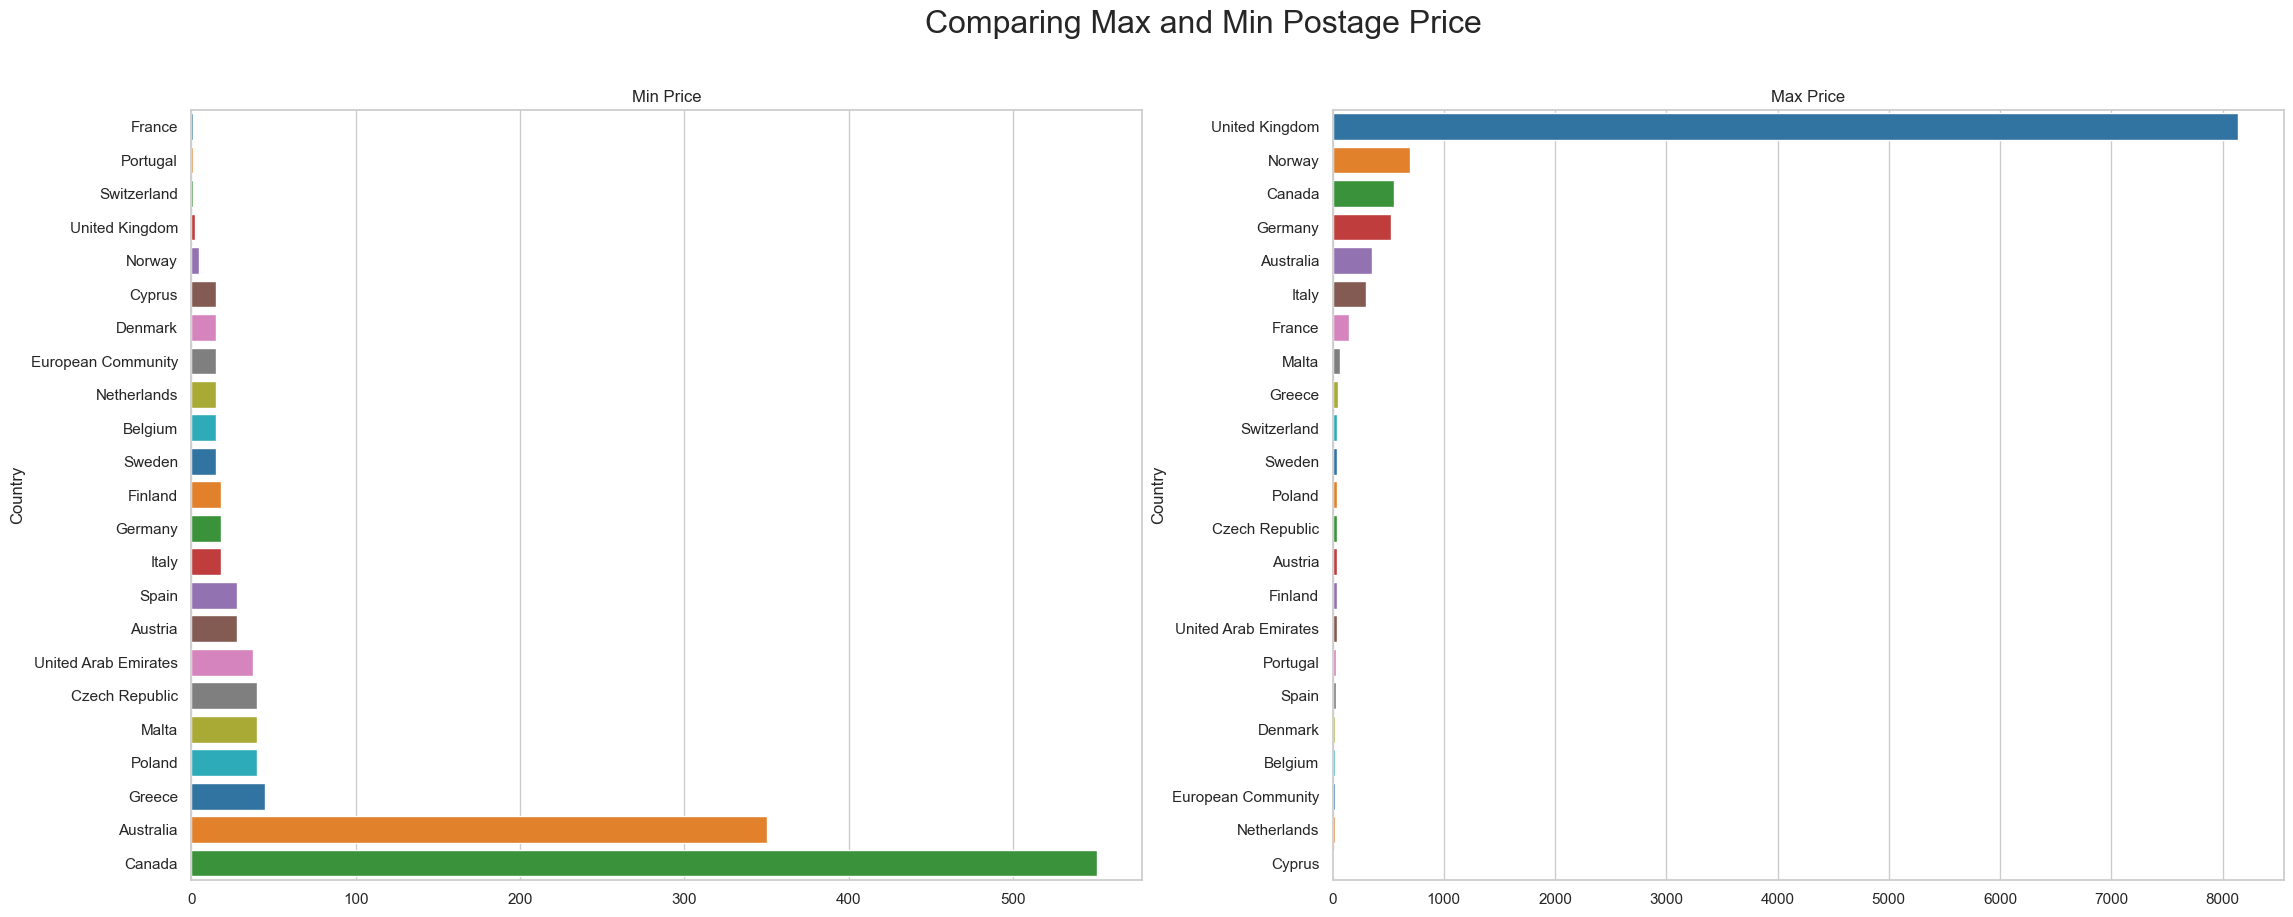

In [242]:
#create facetgrip for max and min
fig, ax = plt.subplots(1,2, figsize=(27,10))
fig.suptitle('Comparing Max and Min Postage Price', fontsize=23)
sns.barplot(x = min.values, y = min.index, ax=ax[0], palette='tab10')
sns.barplot(x = max.values, y = max.index, ax=ax[1], palette='tab10')
ax[0].set_title('Min Price')
ax[1].set_title('Max Price')
plt.show()

In [206]:
#groupby country who has postage then search what country not isin that grouping
not_postage = df[~df['Country'].isin(df[df['Description'] == 'POSTAGE']['Country'].unique())]['Country'].unique()
#convert not_apostage to dataframe
not_postage = pd.DataFrame(not_postage, columns=['Country'])
#start index from 1
not_postage.index = np.arange(1, len(not_postage) + 1)
not_postage

,Country
1,EIRE
2,Lithuania
3,Japan
4,Iceland
5,Channel Islands
6,Israel
7,Singapore
8,Lebanon
9,Saudi Arabia
10,Unspecified


In [207]:
df[(df['Quantity'] < 0) & (df['Country']=='United Kingdom')].value_counts().sum()

7263

In [208]:
df[(df['Quantity'] > 0) & (df['Country']=='United Kingdom')].value_counts().sum()

350556